We use the BLIP2 Image Captioning model from LAVIS (https://github.com/salesforce/LAVIS) to generate captions for images in the Reddit: /r/Art Kaggle dataset (https://www.kaggle.com/datasets/thedevastator/uncovering-online-art-trends-with-reddit-posting).

In [ ]:
import sys
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install salesforce-lavis

Running in Colab.
  Using cached salesforce_lavis-1.0.2-py3-none-any.whl (1.8 MB)
  Using cached contexttimer-0.3.3.tar.gz (4.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached decord-0.6.0-py3-none-manylinux2010_x86_64.whl (13.6 MB)
  Using cached einops-0.7.0-py3-none-any.whl (44 kB)
  Using cached fairscale-0.4.4.tar.gz (235 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached ftfy-6.2.0-py3-none-any.whl (54 kB)
  Using cached iopath-0.1.10.tar.gz (42 kB)
  Preparing metadata (setup.py) ... done
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
  Using cached opencv_python_headless-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (47.8 MB)
  Using cached opendatasets-0.1.22-py3-none-any.whl (15 kB)
  Using cached pre_commit-3.7.0-py2.py3-none-any.whl (204 kB)
  Using cached pycocoevalcap-1.2-py3-none-any.whl

In [ ]:
import torch
from PIL import Image
import requests
from lavis.models import load_model_and_preprocess
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Load in reddit r/art csv

df = pd.read_csv('drive/MyDrive/TMI AI Art Detection Team Drive/Datasets/redditart.csv')
columns = df.columns

title_list = df["title"].tolist()
post_title_list = []
for i in range(len(title_list)):
  post_title_list.append(title_list[i].split(",")[0])
print(post_title_list)
url_list = df["url"].tolist()
print(url_list)

print(len(post_title_list))
print(len(url_list))

['Look closer', 'Paused Movie Frame', 'Look', 'moody water', 'A shark by me', 'My Dog', 'Love is pain2', 'Gold on gold', 'Cable Management', 'Innocent Girl', 'Bagel Time', 'Untitled', 'Collection of Collections', 'Untitled', 'Untitled', 'Reminiscent Stardust', 'Smoke', 'Looking back', 'Muerte', '“winged”', 'A centipede walks', 'Desert Road', 'Roses', 'Double-headed eagle', 'Walkies', 'Infinite cosmos', 'Complicated', 'Long Forgotten', 'red', 'red', 'It says it all', 'Sister Dalish', 'no title', '“Self Portrait', '"Trail Walk"', 'Whip spider', 'Two figures', 'Splat', 'Snail Skull #188', 'Betta Fish', 'Content', 'Sketchbook page 3', 'Trojan sits in the shade', 'At Both Ends', 'Blessed By Circumstance', 'Untitled', 'Saker Falcon', 'untitled', 'Gun', 'Natural Chaos', 'Forest stream', 'Coral', '뜬구름', 'Bonana', 'skull', 'Study', 'Self Portrait', 'Jungle Fever', 'Jet', 'fireworks and explosions', 'Albert', 'The Albatross', 'Symbiosis', 'My Own Winter Wonderland', 'Untitled', 'Foxy Lady', 'Hol

Load an example image

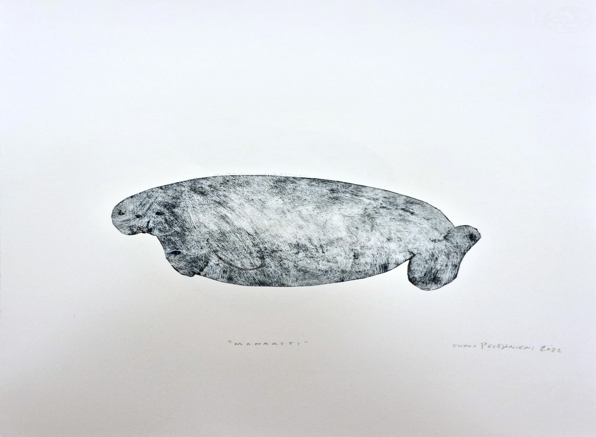

In [ ]:
img_url = 'https://i.redd.it/85zf7hqu3d6a1.jpg'
raw_image = Image.open(requests.get(img_url, stream=True).raw).convert('RGB')
display(raw_image.resize((596, 437)))

In [ ]:
# setup device to use
device = torch.device("cuda") if torch.cuda.is_available() else "cpu"

Load BLIP2 model

In [ ]:
# we associate a model with its preprocessors to make it easier for inference.
model, vis_processors, _ = load_model_and_preprocess(
     name="blip2_opt", model_type="caption_coco_opt2.7b", is_eval=True, device=device
)
vis_processors.keys()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

100%|██████████| 1.89G/1.89G [00:11<00:00, 174MB/s]


Position interpolate from 16x16 to 26x26


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/685 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/691 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/441 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/5.30G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

100%|██████████| 4.07G/4.07G [00:19<00:00, 228MB/s]


dict_keys(['train', 'eval'])

In [ ]:
image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

In [ ]:
model.generate({"image": image})

['a drawing of a large animal on a white background']

Generate captions for all images in dataset

In [ ]:
captions_list = []
good_urls_list = []
#Generate captions for all images from reddit r/art dataset
for i in range(len(url_list)):
  img_url = url_list[i]

  if img_url != '':
    try:
      req = requests.get(img_url, stream=True)
      raw_image = Image.open(req.raw).convert('RGB')
      image = vis_processors["eval"](raw_image).unsqueeze(0).to(device)

      #save images and url
      captions_list.append(model.generate({"image": image}))
      good_urls_list.append(img_url)

    #https://stackoverflow.com/questions/16511337/correct-way-to-try-except-using-python-requests-module
    except requests.exceptions.HTTPError as errh:
        print ("Http Error:",errh)
    except requests.exceptions.ConnectionError as errc:
        print ("Error Connecting:",errc)
    except requests.exceptions.Timeout as errt:
        print ("Timeout Error:",errt)
    except requests.exceptions.RequestException as err:
        print ("OOps: Something Else",err)
    except:
      print("Image can't be read")

In [ ]:
captions_dict = {}

#Remove deleted images
for i in range(len(captions_list)):
  if captions_list[i] != "image not found" and captions_list[i][0].find("deleted") == -1:
    captions_dict[good_urls_list[i]] = captions_list[i][0]


#Export the good urls and captions to a CSV
captions_df = pd.DataFrame.from_dict(captions_dict, orient="index")
captions_df.to_csv("drive/MyDrive/TMI AI Art Detection Team Drive/Datasets/blip_captions.csv")


In [ ]:
print(captions_dict)

{'https://i.redd.it/go1tdcw0zd6a1.jpg': 'a painting of a building under a bridge', 'https://i.redd.it/9rfxha39gf6a1.jpg': 'a person holding up a piece of paper with a painting on it', 'https://i.redd.it/1hguftkyvd6a1.jpg': 'a drawing of a dog with a pink collar', 'https://i.redd.it/1yuot30nbf6a1.jpg': 'a drawing of a human skeleton surrounded by hands', 'https://i.redd.it/1zbaczflbf6a1.jpg': 'a cartoon woman with red hair smoking a cigarette', 'https://i.redd.it/fhpdkw4n9f6a1.jpg': 'a black and white photo of a woman', 'https://i.redd.it/ll933npl7f6a1.jpg': 'a cartoon of a person wearing a hoodie', 'https://i.redd.it/p3tkl2u03f6a1.jpg': 'a drawing of a man cutting a tree trunk with a chainsaw', 'https://i.redd.it/hibyfpot1f6a1.jpg': "a colorful painting of a woman's face", 'https://i.redd.it/nqhro5pe1f6a1.jpg': 'a skeleton in a suit and tie smoking a cigarette', 'https://i.redd.it/vpgu3uvrxe6a1.jpg': 'a painting of a skull on a wall', 'https://i.redd.it/74aki097we6a1.jpg': 'a large pie